# Attempting Random Forest

With our abysmal MSE score for Multiple Linear Regression, we wanted to try other methods to see if we could still prove our hypothesis correctly.

Now, we attempted Random Forest to see if another model may be able to accurately predict a relationship from our data. Random Forest is a model that is well equiped for large datasets and may provide a higher accuracy measure for us.

In [58]:
# import packages and get data
import numpy as np
import pandas as pd
import sklearn #if this doesn't work, run in terminal: $pip3 install -U scikit-learn scipy matplotlib 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

transactions = pd.read_csv('../data/Transactions.csv')
product_range = pd.read_csv('../data/Product_range.csv')

In [59]:
transactions['Date_and_time_of_unloading'] = pd.to_datetime(transactions['Date_and_time_of_unloading'])
transactions['Date'] = transactions['Date_and_time_of_unloading'].dt.date
transactions = transactions.drop(columns=['Date_and_time_of_unloading'])#,'Discount_amount', 'Percentage_markup', 'Discount_percentage', 'Profit'
transactions = transactions.dropna().reset_index(drop=True)

In [60]:
product_range = product_range.drop(columns=['Base_unit'])#,'Country_of_Origin'
product_range['Name'] = product_range['Name'].str.replace('\d+','', regex=True).str.strip('.')
product_range.columns = ['Product_code', 'Vendor', 'Name', 'Price','Country', 'Size', 'ABV']
product_range['Product_code'] = pd.to_numeric(product_range['Product_code'])
product_range['Price'] = pd.to_numeric(product_range['Price'])
product_range['Size'] = pd.to_numeric(product_range['Size'])
product_range['ABV'] = pd.to_numeric(product_range['ABV'])
product_range = product_range.dropna()
product_range = product_range.reset_index(drop=True)
product_range['Country'] = product_range['Country'].replace(['Denmark', 'United Kingdom', 'Estonia', 'Spain', 'Germany', 'Norway', 'Italy', 'France', '???', 'Ireland', 
                                  'Canada', 'Finland', 'Scotland', 'Japan', 'Latvia', 'Czech', 'Croatia', 'Austria', 'Switzerland', 
                                  'China', 'Brazil', 'Israel'], 'Other')
product_range = pd.get_dummies(product_range, columns = ['Country'])

In [61]:
# Merge the two datasets
df = product_range.merge(transactions, on= 'Product_code')
print("Merged shape: " + str(df.shape))

Merged shape: (29917, 19)


We will run Random Forest Regressor on our merged dataset, let's see how it does!

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X3 = df[['Product_code', 'Size', 'ABV', 'Amount', 'Discount_amount', 'Profit', 'Percentage_markup', 'Discount_percentage', "Sale_amount"]]
Y3 = df['Price']

X3_train, X3_test, y3_train, y3_true = train_test_split(X3, Y3, test_size = 0.8, random_state = 0)

model = RandomForestRegressor(random_state=42)
model.fit(X3_train,y3_train)
y_pred = model.predict(X3_test)
print("The MSE is = " + str(mean_squared_error(y_pred,y3_true)))

The MSE is = 35088.79453183756


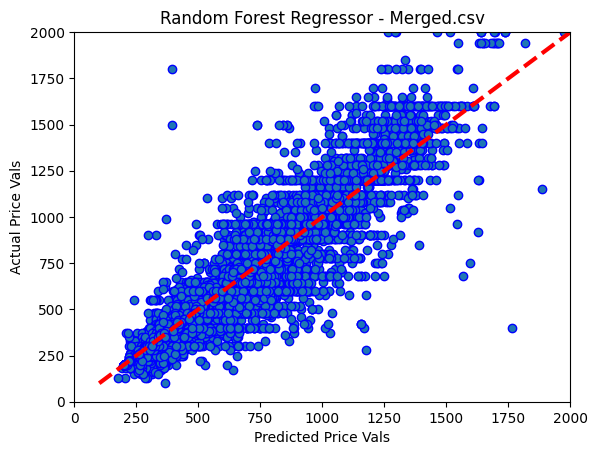

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y3_true, edgecolors=(0, 0, 1))
ax.plot([y3_true.min(), y3_true.max()], [y3_true.min(), y3_true.max()], 'r--', lw=3)
plt.xlim(0,2000)
plt.ylim(0,2000)
ax.set_xlabel('Predicted Price Vals')
ax.set_ylabel('Actual Price Vals')
plt.title("Random Forest Regressor - Merged.csv")
plt.show()

Despite our MSE, we can see that most of the predictions and actual values do fall along a similar length. However, our accuracy is low enough to determine that Random Forest Regressor does not work well.